<a href="https://colab.research.google.com/github/santiagonajera/ArbolDecision-EntregasTiempo/blob/main/ProyeccionDemanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pendiente: 248.07585568917662
Intersección: 97874.51063829788


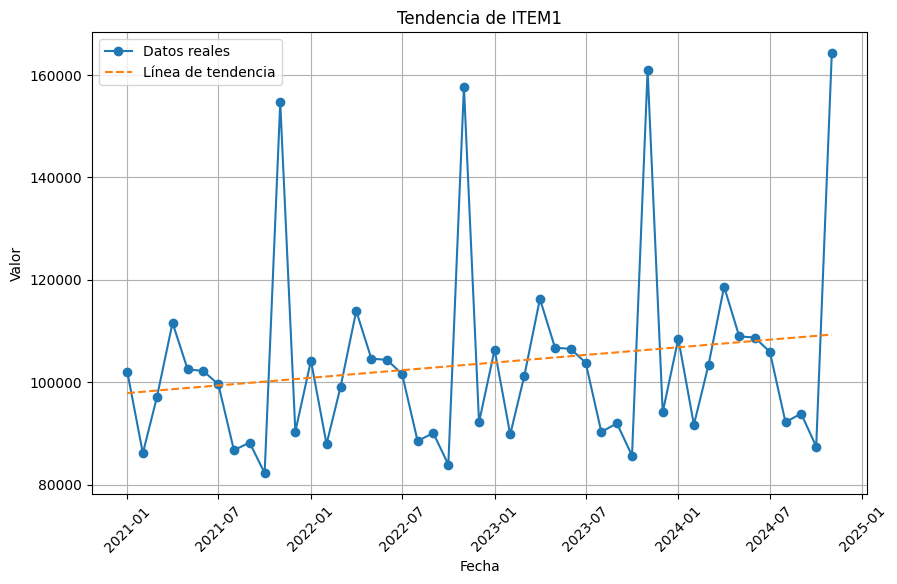

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Cargar el archivo Excel
url = "https://github.com/santiagonajera/optimizacionInventrios/raw/refs/heads/main/EjemploClases-Eco.xlsx"
df = pd.read_excel(url, sheet_name='Historico')

# Extraer los datos de ITEM1
item1_data = df.iloc[1, 1:].values.astype(float)

# Crear un array de índices para los datos (x)
x = np.arange(len(item1_data)).reshape(-1, 1)

# Crear un modelo de regresión lineal
model = LinearRegression()
model.fit(x, item1_data)

# Obtener la pendiente (coeficiente) y la intersección (intercepto)
pendiente = model.coef_[0]
interseccion = model.intercept_

print(f"Pendiente: {pendiente}")
print(f"Intersección: {interseccion}")

# Predecir los valores de la línea de tendencia
y_pred = model.predict(x)

# Graficar los datos y la línea de tendencia
plt.figure(figsize=(10, 6))
plt.plot(df.columns[1:], item1_data, label='Datos reales', marker='o')
plt.plot(df.columns[1:], y_pred, label='Línea de tendencia', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Tendencia de ITEM1')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-2-5a12fd0346c8>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2021-01', periods=len(item1_data), freq='M')


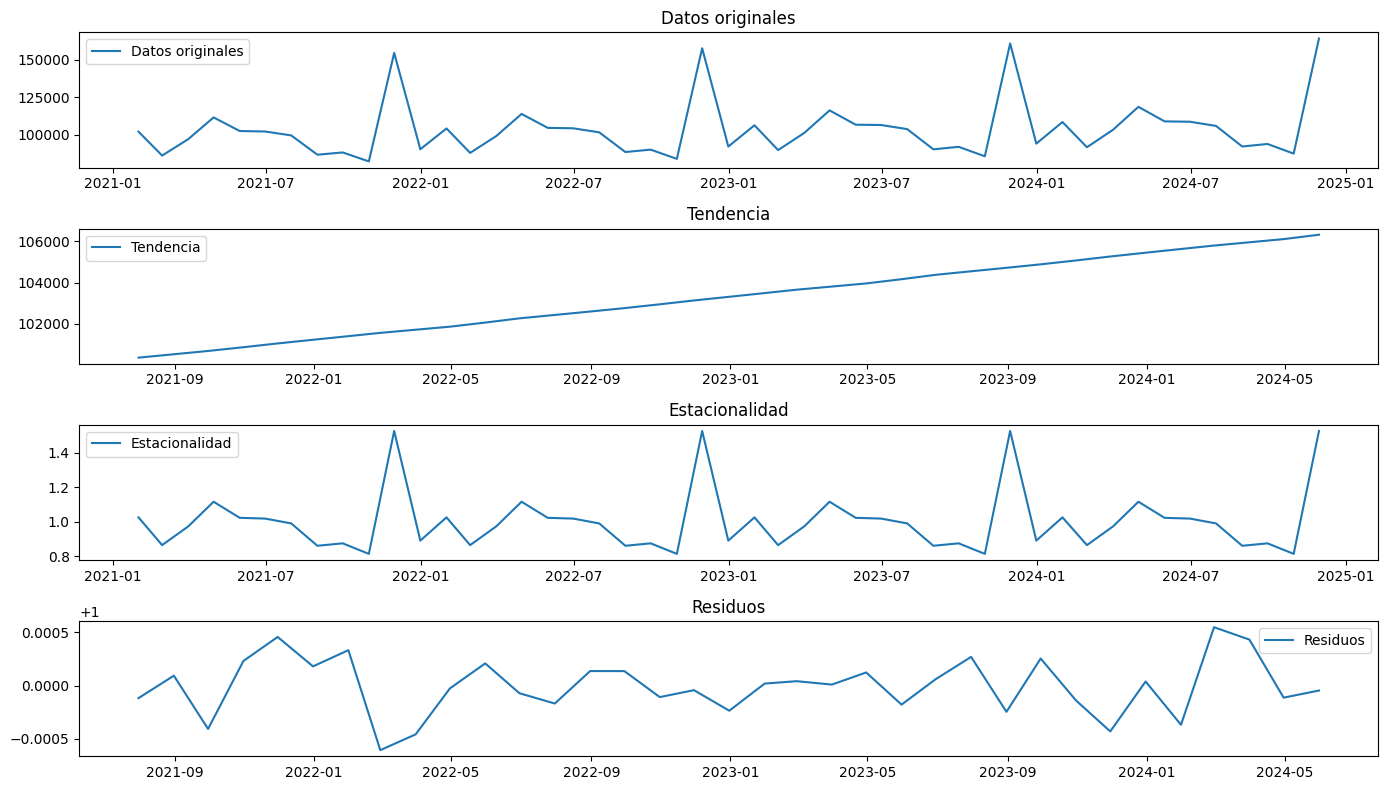

Índices estacionales normalizados:
2021-01-31    1.025060
2021-02-28    0.864198
2021-03-31    0.972902
2021-04-30    1.115652
2021-05-31    1.022336
2021-06-30    1.018009
2021-07-31    0.990036
2021-08-31    0.860444
2021-09-30    0.874458
2021-10-31    0.813388
2021-11-30    1.525801
2021-12-31    0.890288
2022-01-31    1.025060
2022-02-28    0.864198
2022-03-31    0.972902
2022-04-30    1.115652
2022-05-31    1.022336
2022-06-30    1.018009
2022-07-31    0.990036
2022-08-31    0.860444
2022-09-30    0.874458
2022-10-31    0.813388
2022-11-30    1.525801
2022-12-31    0.890288
2023-01-31    1.025060
2023-02-28    0.864198
2023-03-31    0.972902
2023-04-30    1.115652
2023-05-31    1.022336
2023-06-30    1.018009
2023-07-31    0.990036
2023-08-31    0.860444
2023-09-30    0.874458
2023-10-31    0.813388
2023-11-30    1.525801
2023-12-31    0.890288
2024-01-31    1.025060
2024-02-29    0.864198
2024-03-31    0.972902
2024-04-30    1.115652
2024-05-31    1.022336
2024-06-30    1.018009

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Cargar el archivo Excel
url = "https://github.com/santiagonajera/optimizacionInventrios/raw/refs/heads/main/EjemploClases-Eco.xlsx"
df = pd.read_excel(url, sheet_name='Historico')

# Extraer los datos de ITEM1
item1_data = df.iloc[1, 1:].values.astype(float)

# Crear un DataFrame con los datos de ITEM1
dates = pd.date_range(start='2021-01', periods=len(item1_data), freq='M')
df_item1 = pd.DataFrame({'value': item1_data}, index=dates)

# Descomponer la serie temporal en tendencia, estacionalidad y residuos
result = seasonal_decompose(df_item1['value'], model='multiplicative', period=12)

# Obtener los índices estacionales
seasonal_indices = result.seasonal

# Normalizar los índices estacionales
seasonal_indices_normalized = seasonal_indices / seasonal_indices.mean()

# Aplicar los índices estacionales a los datos originales
seasonal_data = df_item1['value'] / seasonal_indices_normalized

# Graficar los datos originales, la tendencia, la estacionalidad y los residuos
plt.figure(figsize=(14, 8))

plt.subplot(4, 1, 1)
plt.plot(df_item1['value'], label='Datos originales')
plt.title('Datos originales')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia')
plt.title('Tendencia')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal_indices_normalized, label='Estacionalidad')
plt.title('Estacionalidad')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuos')
plt.title('Residuos')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir los índices estacionales normalizados
print("Índices estacionales normalizados:")
print(seasonal_indices_normalized)

<ipython-input-3-9afebf45adcb>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2021-01', periods=len(item1_data), freq='M')


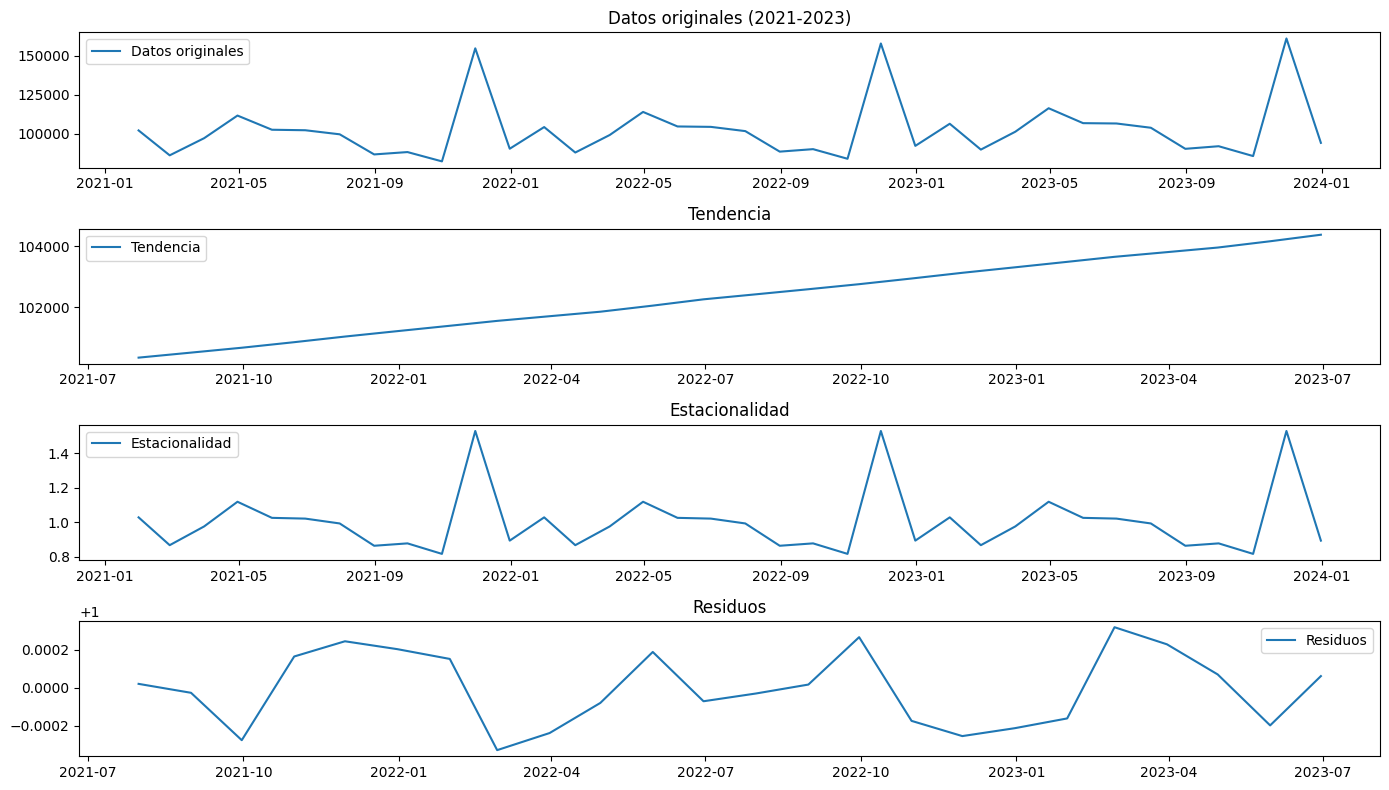

Índices estacionales normalizados:
2021-01-31    1.027592
2021-02-28    0.865936
2021-03-31    0.974916
2021-04-30    1.118265
2021-05-31    1.024697
2021-06-30    1.020339
2021-07-31    0.992165
2021-08-31    0.862516
2021-09-30    0.876346
2021-10-31    0.815304
2021-11-30    1.529617
2021-12-31    0.892306
2022-01-31    1.027592
2022-02-28    0.865936
2022-03-31    0.974916
2022-04-30    1.118265
2022-05-31    1.024697
2022-06-30    1.020339
2022-07-31    0.992165
2022-08-31    0.862516
2022-09-30    0.876346
2022-10-31    0.815304
2022-11-30    1.529617
2022-12-31    0.892306
2023-01-31    1.027592
2023-02-28    0.865936
2023-03-31    0.974916
2023-04-30    1.118265
2023-05-31    1.024697
2023-06-30    1.020339
2023-07-31    0.992165
2023-08-31    0.862516
2023-09-30    0.876346
2023-10-31    0.815304
2023-11-30    1.529617
2023-12-31    0.892306
Freq: ME, Name: seasonal, dtype: float64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Cargar el archivo Excel
url = "https://github.com/santiagonajera/optimizacionInventrios/raw/refs/heads/main/EjemploClases-Eco.xlsx"
df = pd.read_excel(url, sheet_name='Historico')

# Extraer los datos de ITEM1
item1_data = df.iloc[1, 1:].values.astype(float)

# Crear un DataFrame con los datos de ITEM1
dates = pd.date_range(start='2021-01', periods=len(item1_data), freq='M')
df_item1 = pd.DataFrame({'value': item1_data}, index=dates)

# Filtrar los datos para incluir solo los años 2021, 2022 y 2023
df_item1_filtered = df_item1.loc['2021-01':'2023-12']

# Descomponer la serie temporal en tendencia, estacionalidad y residuos
result = seasonal_decompose(df_item1_filtered['value'], model='multiplicative', period=12)

# Obtener los índices estacionales
seasonal_indices = result.seasonal

# Normalizar los índices estacionales
seasonal_indices_normalized = seasonal_indices / seasonal_indices.mean()

# Aplicar los índices estacionales a los datos originales
seasonal_data = df_item1_filtered['value'] / seasonal_indices_normalized

# Graficar los datos originales, la tendencia, la estacionalidad y los residuos
plt.figure(figsize=(14, 8))

plt.subplot(4, 1, 1)
plt.plot(df_item1_filtered['value'], label='Datos originales')
plt.title('Datos originales (2021-2023)')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia')
plt.title('Tendencia')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal_indices_normalized, label='Estacionalidad')
plt.title('Estacionalidad')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuos')
plt.title('Residuos')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir los índices estacionales normalizados
print("Índices estacionales normalizados:")
print(seasonal_indices_normalized)

<ipython-input-4-79e9325952c1>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2021-01', periods=len(item1_data), freq='M')
<ipython-input-4-79e9325952c1>:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-12', periods=3, freq='M')


Forecast para los próximos 3 meses:
       Fecha       Forecast
0 2024-12-31   87072.431889
1 2025-01-31  163726.478171
2 2025-02-28   95724.470373


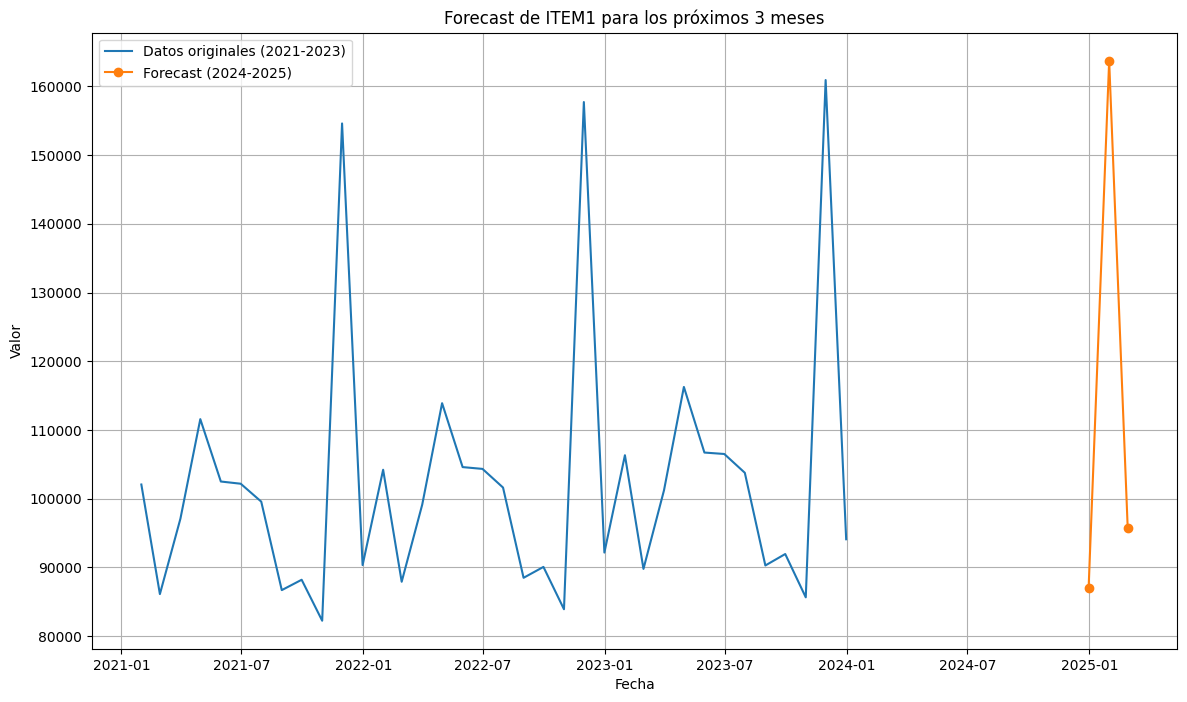

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

# Cargar el archivo Excel
url = "https://github.com/santiagonajera/optimizacionInventrios/raw/refs/heads/main/EjemploClases-Eco.xlsx"
df = pd.read_excel(url, sheet_name='Historico')

# Extraer los datos de ITEM1
item1_data = df.iloc[1, 1:].values.astype(float)

# Crear un DataFrame con los datos de ITEM1
dates = pd.date_range(start='2021-01', periods=len(item1_data), freq='M')
df_item1 = pd.DataFrame({'value': item1_data}, index=dates)

# Filtrar los datos para incluir solo los años 2021, 2022 y 2023
df_item1_filtered = df_item1.loc['2021-01':'2023-12']

# Descomponer la serie temporal en tendencia, estacionalidad y residuos
result = seasonal_decompose(df_item1_filtered['value'], model='multiplicative', period=12)

# Obtener los índices estacionales
seasonal_indices = result.seasonal

# Normalizar los índices estacionales
seasonal_indices_normalized = seasonal_indices / seasonal_indices.mean()

# Aplicar los índices estacionales a los datos originales
seasonal_data = df_item1_filtered['value'] / seasonal_indices_normalized

# Calcular la tendencia utilizando regresión lineal
x = np.arange(len(df_item1_filtered)).reshape(-1, 1)
model = LinearRegression()
model.fit(x, df_item1_filtered['value'])

# Predecir la tendencia para los próximos 3 meses
future_dates = pd.date_range(start='2024-12', periods=3, freq='M')
future_x = np.arange(len(df_item1_filtered), len(df_item1_filtered) + 3).reshape(-1, 1)
future_trend = model.predict(future_x)

# Aplicar los índices estacionales a la tendencia para obtener el forecast
future_seasonal_indices = seasonal_indices_normalized[-3:].values
future_forecast = future_trend * future_seasonal_indices

# Crear un DataFrame con los resultados
future_df = pd.DataFrame({'Fecha': future_dates, 'Forecast': future_forecast})

# Imprimir el forecast
print("Forecast para los próximos 3 meses:")
print(future_df)

# Graficar los datos originales y el forecast
plt.figure(figsize=(14, 8))

plt.plot(df_item1_filtered.index, df_item1_filtered['value'], label='Datos originales (2021-2023)')
plt.plot(future_dates, future_forecast, label='Forecast (2024-2025)', marker='o')
plt.title('Forecast de ITEM1 para los próximos 3 meses')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-5-ee3a2367ef15>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2021-01', periods=len(item1_data), freq='M')
<ipython-input-5-ee3a2367ef15>:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-12', periods=3, freq='M')


Forecast para los próximos 3 meses:
       Fecha       Forecast
0 2024-12-31   95782.972406
1 2025-01-31   89295.455247
2 2025-02-28  167884.199081


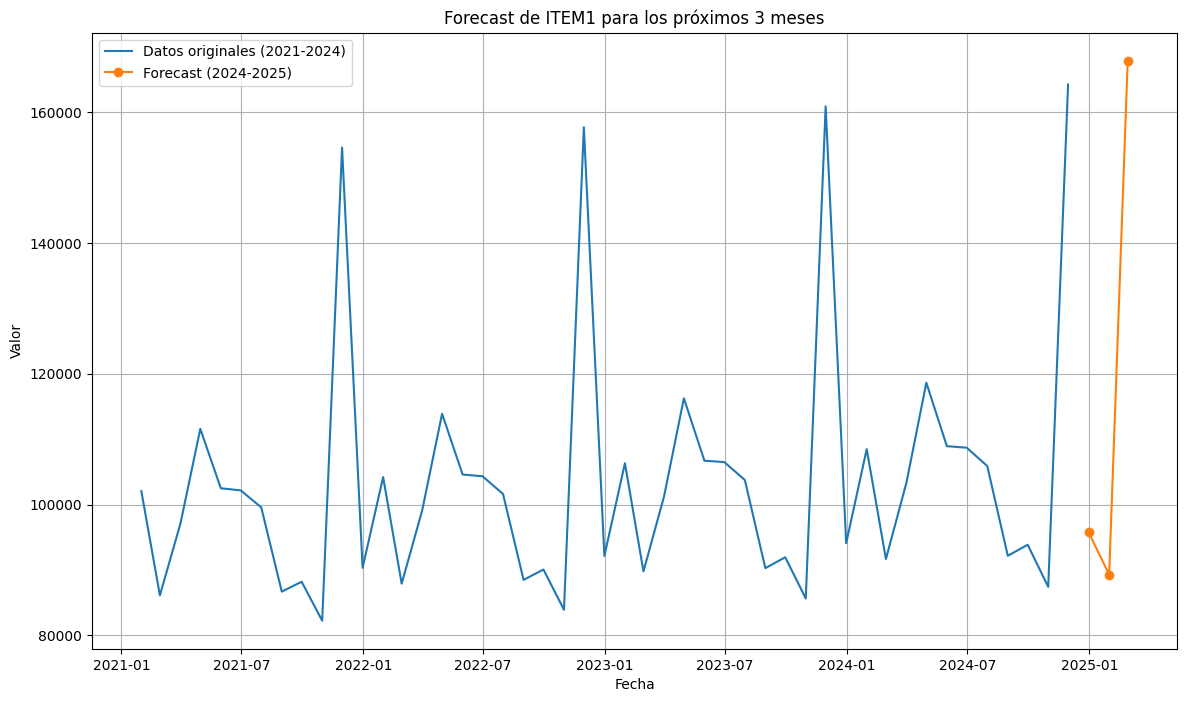

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

# Cargar el archivo Excel
url = "https://github.com/santiagonajera/optimizacionInventrios/raw/refs/heads/main/EjemploClases-Eco.xlsx"
df = pd.read_excel(url, sheet_name='Historico')

# Extraer los datos de ITEM1
item1_data = df.iloc[1, 1:].values.astype(float)

# Crear un DataFrame con los datos de ITEM1
dates = pd.date_range(start='2021-01', periods=len(item1_data), freq='M')
df_item1 = pd.DataFrame({'value': item1_data}, index=dates)

# Descomponer la serie temporal en tendencia, estacionalidad y residuos
result = seasonal_decompose(df_item1['value'], model='multiplicative', period=12)

# Obtener los índices estacionales
seasonal_indices = result.seasonal

# Normalizar los índices estacionales
seasonal_indices_normalized = seasonal_indices / seasonal_indices.mean()

# Calcular la tendencia utilizando regresión lineal
x = np.arange(len(df_item1)).reshape(-1, 1)
model = LinearRegression()
model.fit(x, df_item1['value'])

# Predecir la tendencia para los próximos 3 meses
future_dates = pd.date_range(start='2024-12', periods=3, freq='M')
future_x = np.arange(len(df_item1), len(df_item1) + 3).reshape(-1, 1)
future_trend = model.predict(future_x)

# Aplicar los índices estacionales a la tendencia para obtener el forecast
future_seasonal_indices = seasonal_indices_normalized[-3:].values
future_forecast = future_trend * future_seasonal_indices

# Crear un DataFrame con los resultados
future_df = pd.DataFrame({'Fecha': future_dates, 'Forecast': future_forecast})

# Imprimir el forecast
print("Forecast para los próximos 3 meses:")
print(future_df)

# Graficar los datos originales y el forecast
plt.figure(figsize=(14, 8))

plt.plot(df_item1.index, df_item1['value'], label='Datos originales (2021-2024)')
plt.plot(future_dates, future_forecast, label='Forecast (2024-2025)', marker='o')
plt.title('Forecast de ITEM1 para los próximos 3 meses')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-6-c9f3550c211d>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2021-01', periods=len(item1_data), freq='M')
<ipython-input-6-c9f3550c211d>:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-12', periods=3, freq='M')


Forecast para los próximos 3 meses:
       Fecha       Forecast
0 2024-12-31   95782.972406
1 2025-01-31   89295.455247
2 2025-02-28  167884.199081


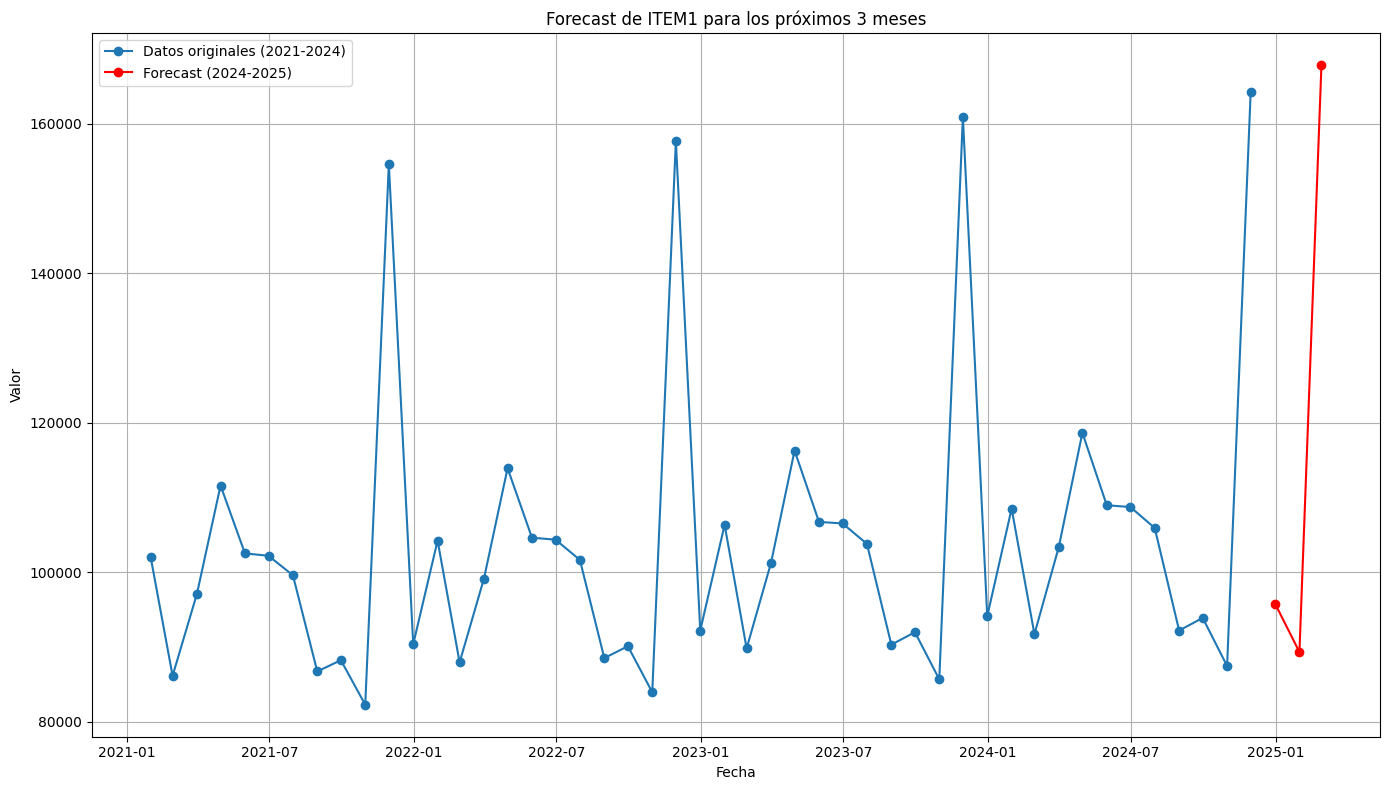

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

# Cargar el archivo Excel
url = "https://github.com/santiagonajera/optimizacionInventrios/raw/refs/heads/main/EjemploClases-Eco.xlsx"
df = pd.read_excel(url, sheet_name='Historico')

# Extraer los datos de ITEM1
item1_data = df.iloc[1, 1:].values.astype(float)

# Crear un DataFrame con los datos de ITEM1
dates = pd.date_range(start='2021-01', periods=len(item1_data), freq='M')
df_item1 = pd.DataFrame({'value': item1_data}, index=dates)

# Descomponer la serie temporal en tendencia, estacionalidad y residuos
result = seasonal_decompose(df_item1['value'], model='multiplicative', period=12)

# Obtener los índices estacionales
seasonal_indices = result.seasonal

# Normalizar los índices estacionales
seasonal_indices_normalized = seasonal_indices / seasonal_indices.mean()

# Calcular la tendencia utilizando regresión lineal
x = np.arange(len(df_item1)).reshape(-1, 1)
model = LinearRegression()
model.fit(x, df_item1['value'])

# Predecir la tendencia para los próximos 3 meses
future_dates = pd.date_range(start='2024-12', periods=3, freq='M')
future_x = np.arange(len(df_item1), len(df_item1) + 3).reshape(-1, 1)
future_trend = model.predict(future_x)

# Aplicar los índices estacionales a la tendencia para obtener el forecast
future_seasonal_indices = seasonal_indices_normalized[-3:].values
future_forecast = future_trend * future_seasonal_indices

# Crear un DataFrame con los resultados
future_df = pd.DataFrame({'Fecha': future_dates, 'Forecast': future_forecast})

# Imprimir el forecast
print("Forecast para los próximos 3 meses:")
print(future_df)

# Graficar los datos originales y el forecast
plt.figure(figsize=(14, 8))

# Datos originales
plt.plot(df_item1.index, df_item1['value'], label='Datos originales (2021-2024)', marker='o')

# Forecast
plt.plot(future_dates, future_forecast, label='Forecast (2024-2025)', marker='o', color='red')

plt.title('Forecast de ITEM1 para los próximos 3 meses')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

# Cargar el archivo Excel
url = "https://github.com/santiagonajera/optimizacionInventrios/raw/refs/heads/main/EjemploClases-Eco.xlsx"
df = pd.read_excel(url, sheet_name='Historico')

# Extraer los nombres de los items
items = df.iloc[1:, 0].values

# Crear un DataFrame con los datos de todos los items
dates = pd.date_range(start='2021-01', periods=df.shape[1] - 1, freq='M')
df_items = pd.DataFrame(df.iloc[1:, 1:].values, columns=dates, index=items).T

# Iterar sobre cada item para calcular el forecast
for item in items:
    item_data = df_items[item].values.astype(float)

    # Descomponer la serie temporal en tendencia, estacionalidad y residuos
    result = seasonal_decompose(item_data, model='multiplicative', period=12)

    # Obtener los índices estacionales
    seasonal_indices = result.seasonal

    # Normalizar los índices estacionales
    seasonal_indices_normalized = seasonal_indices / seasonal_indices.mean()

    # Calcular la tendencia utilizando regresión lineal
    x = np.arange(len(item_data)).reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, item_data)

    # Predecir la tendencia para los próximos 3 meses
    future_dates = pd.date_range(start='2024-12', periods=3, freq='M')
    future_x = np.arange(len(item_data), len(item_data) + 3).reshape(-1, 1)
    future_trend = model.predict(future_x)

    # Aplicar los índices estacionales a la tendencia para obtener el forecast
    future_seasonal_indices = seasonal_indices_normalized[-3:].values
    future_forecast = future_trend * future_seasonal_indices

    # Crear un DataFrame con los resultados
    future_df = pd.DataFrame({'Fecha': future_dates, 'Forecast': future_forecast})

    # Imprimir el forecast
    print(f"Forecast para {item} para los próximos 3 meses:")
    print(future_df)

    # Graficar los datos originales y el forecast
    plt.figure(figsize=(14, 8))

    # Datos originales
    plt.plot(dates, item_data, label=f'Datos originales de {item} (2021-2024)', marker='o')

    # Forecast
    plt.plot(future_dates, future_forecast, label=f'Forecast de {item} (2024-2025)', marker='o', color='red')

    plt.title(f'Forecast de {item} para los próximos 3 meses')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<ipython-input-7-a582d08e3299>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2021-01', periods=df.shape[1] - 1, freq='M')
<ipython-input-7-a582d08e3299>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-12', periods=3, freq='M')


AttributeError: 'numpy.ndarray' object has no attribute 'values'

Forecast para ITEM 2 para los próximos 3 meses:
       Fecha       Forecast
0 2024-12-31   95782.972406
1 2025-01-31   89295.455247
2 2025-02-28  167884.199081


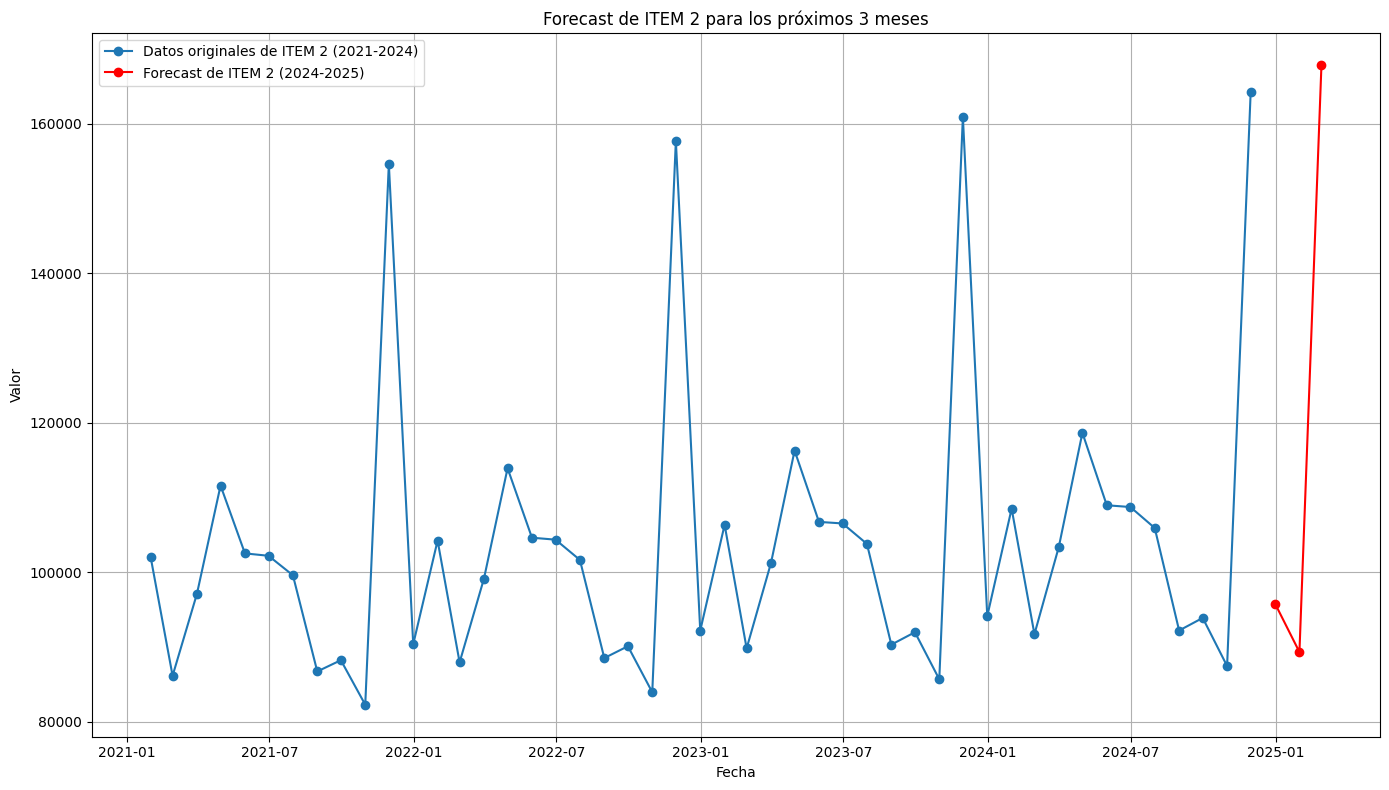

Forecast para ITEM 3 para los próximos 3 meses:
       Fecha       Forecast
0 2024-12-31   73405.023023
1 2025-01-31   66986.484120
2 2025-02-28  134891.154291


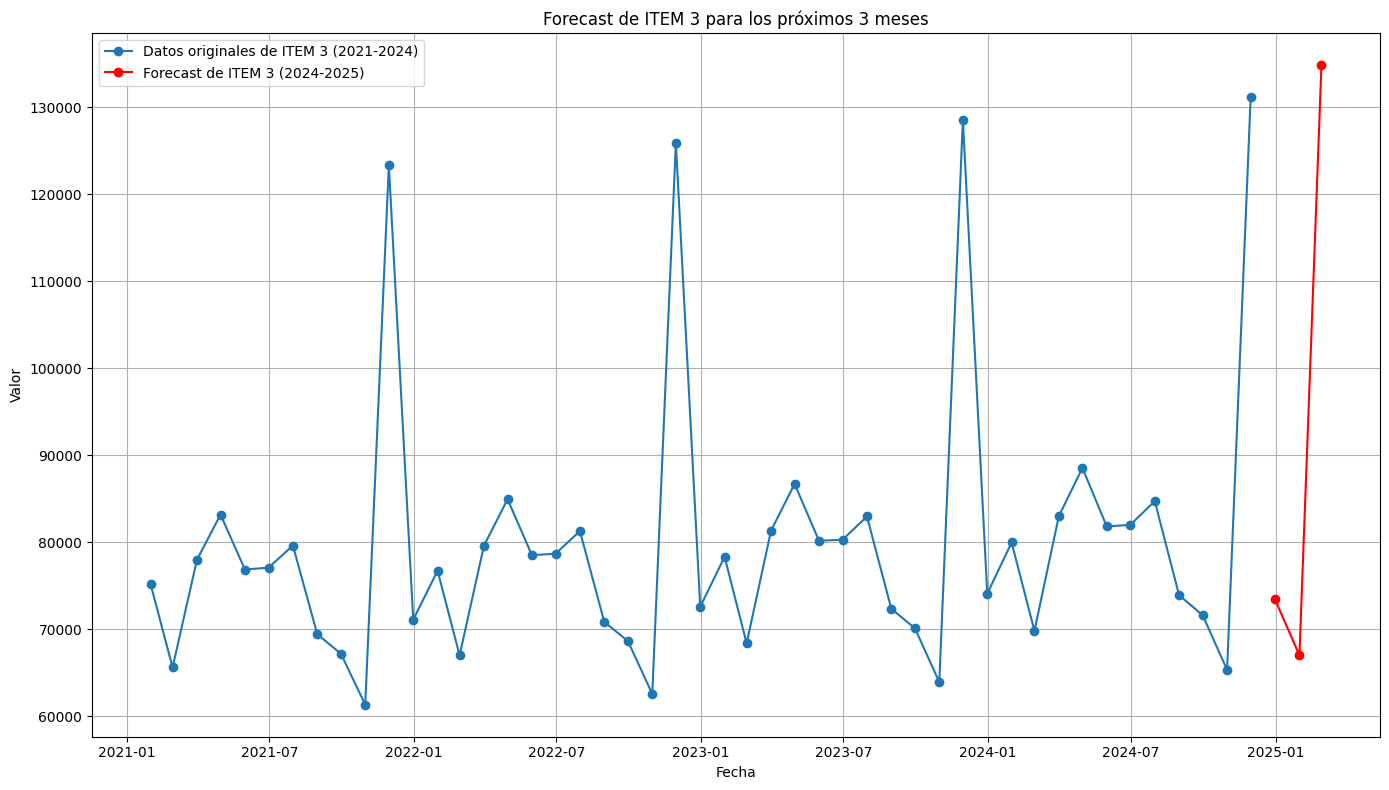

Forecast para ITEM 4 para los próximos 3 meses:
       Fecha       Forecast
0 2024-12-31   86621.287014
1 2025-01-31   79286.644297
2 2025-02-28  150453.729143


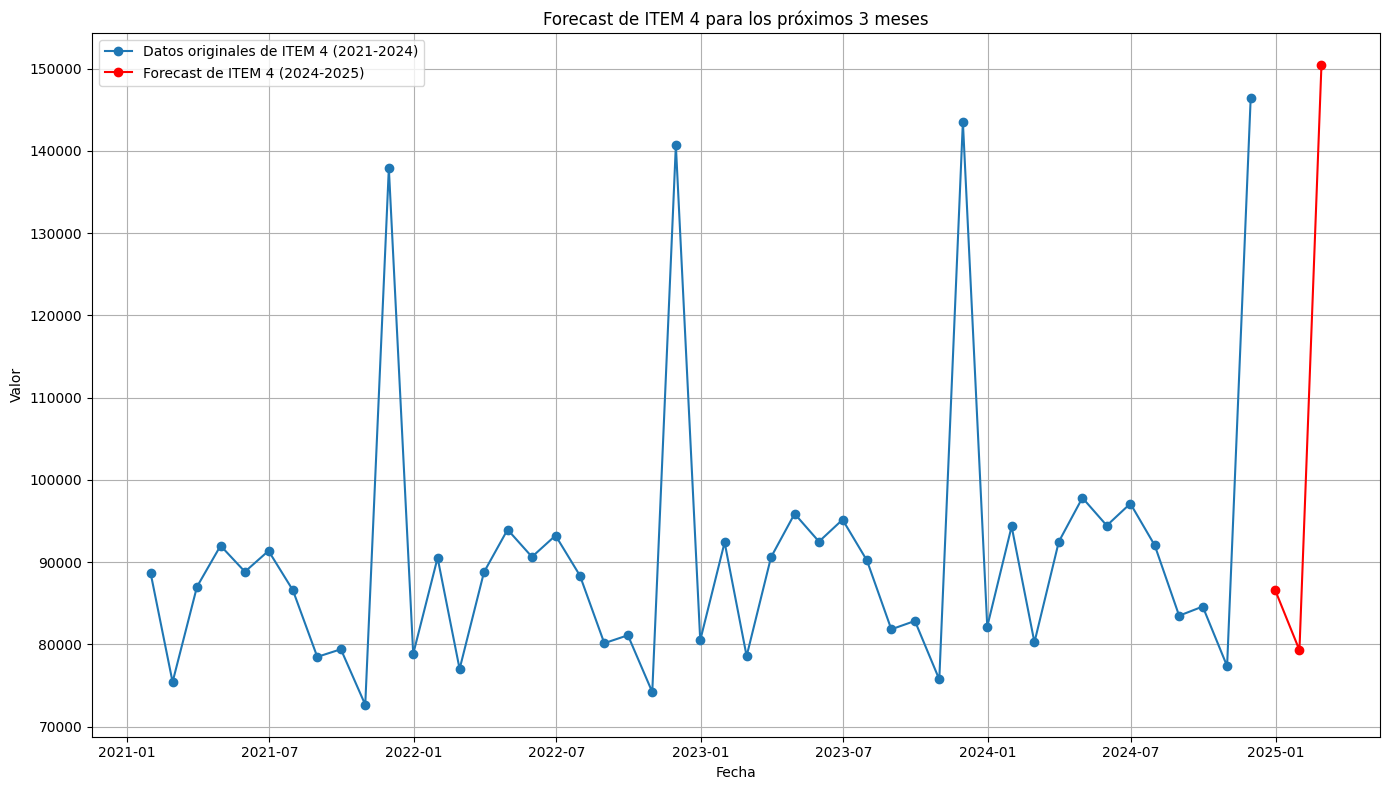

Forecast para ITEM 5 para los próximos 3 meses:
       Fecha      Forecast
0 2024-12-31  53639.130276
1 2025-01-31  48357.346535
2 2025-02-28  97090.084462


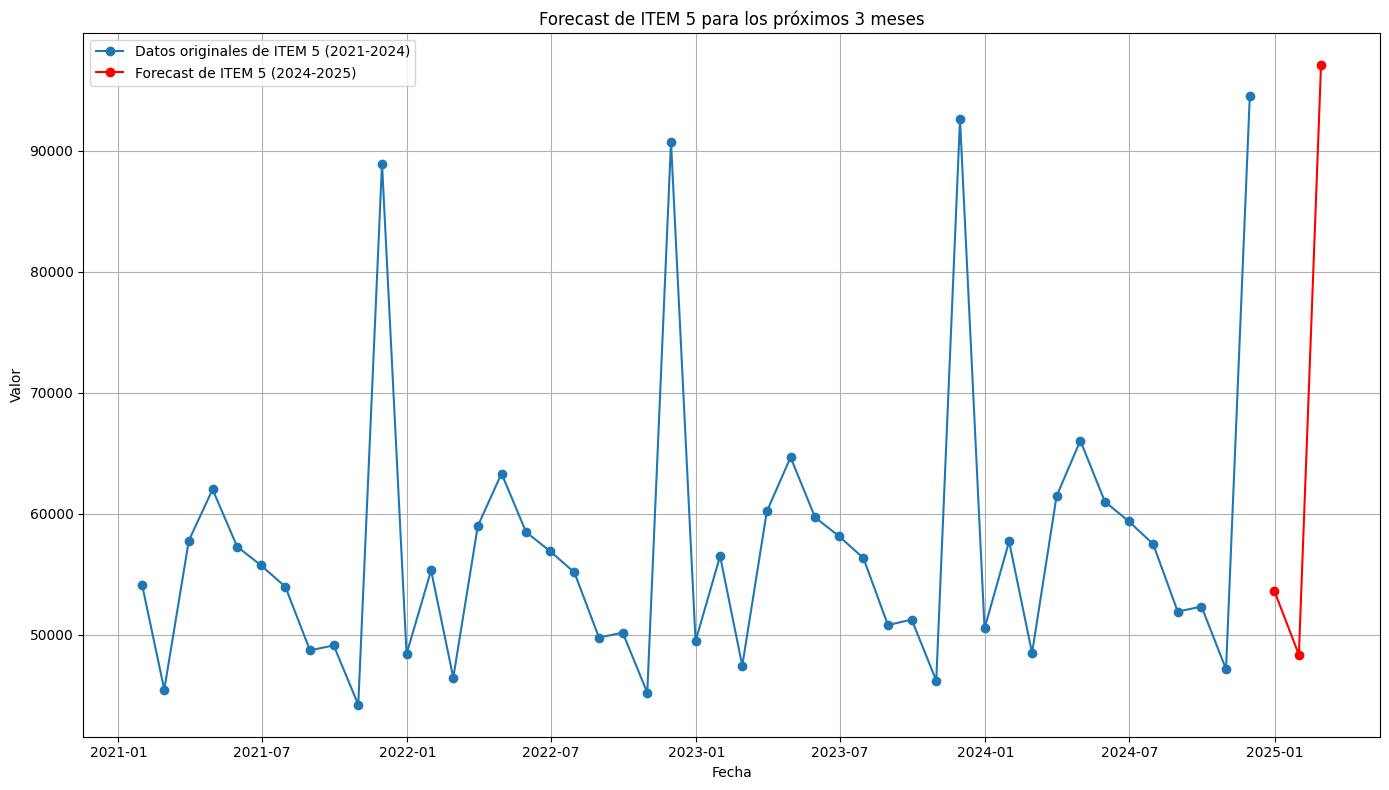

Forecast para ITEM 6 para los próximos 3 meses:
       Fecha      Forecast
0 2024-12-31  45714.932985
1 2025-01-31  42820.167091
2 2025-02-28  84383.488628


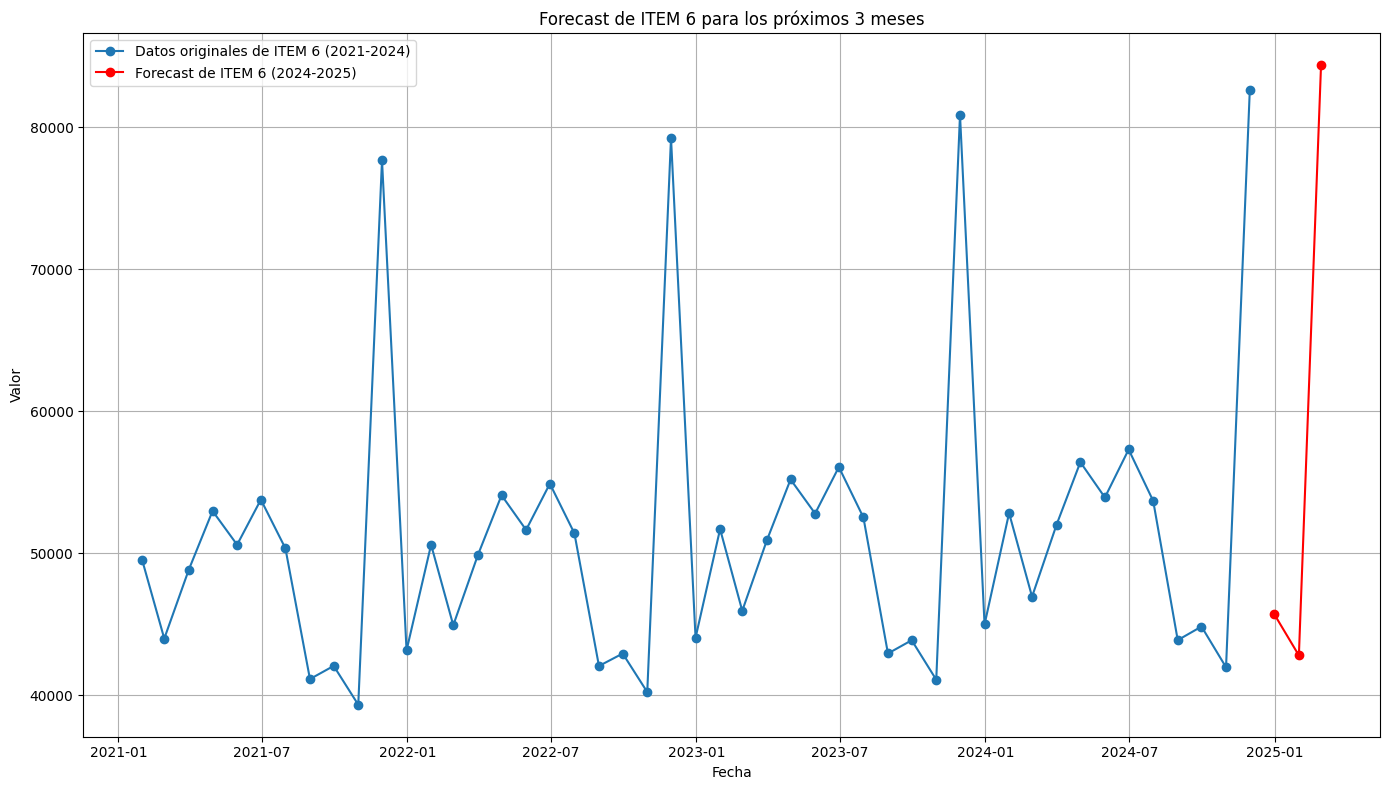

Forecast para ITEM 7 para los próximos 3 meses:
       Fecha       Forecast
0 2024-12-31   86326.811984
1 2025-01-31   80581.248317
2 2025-02-28  154040.463767


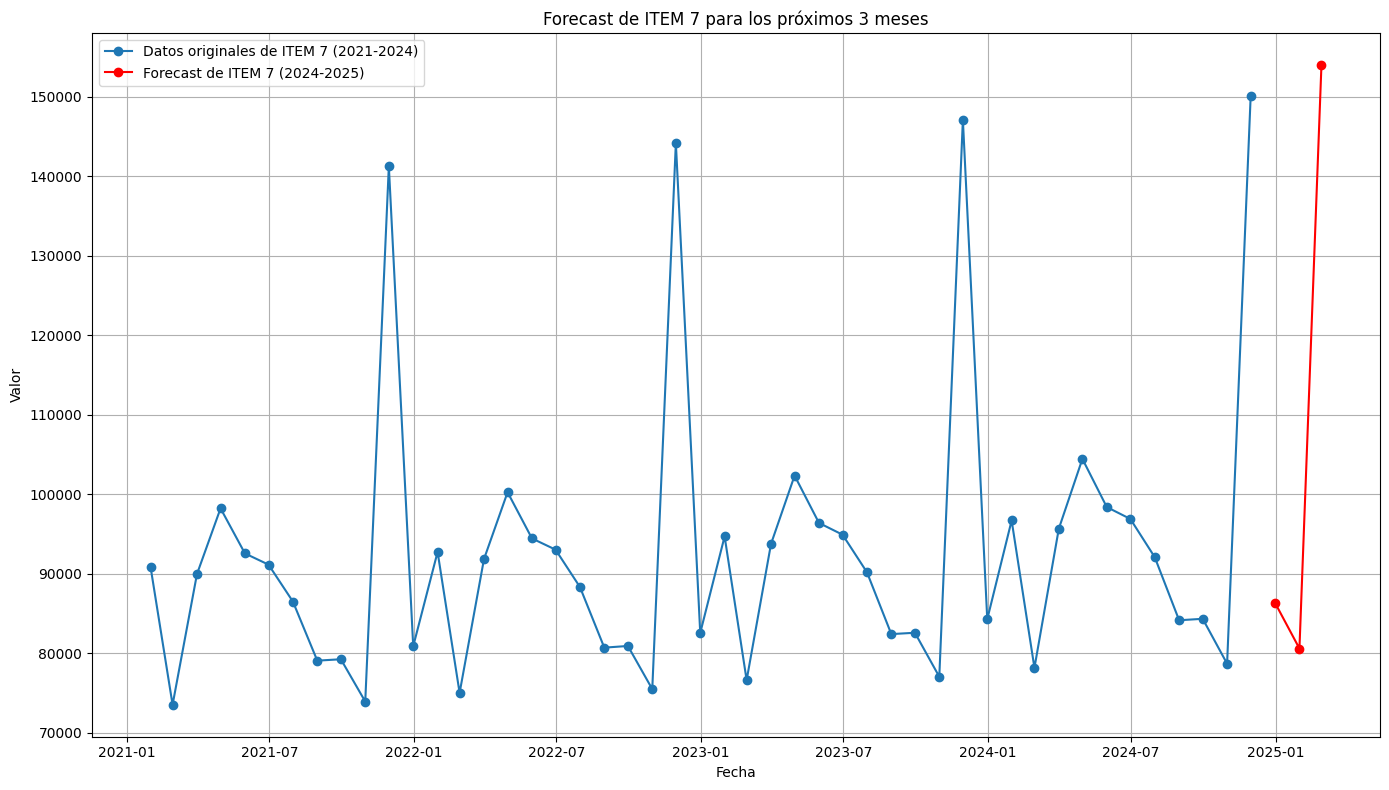

Forecast para ITEM 8 para los próximos 3 meses:
       Fecha      Forecast
0 2024-12-31  47976.811271
1 2025-01-31  46688.562863
2 2025-02-28  81996.892683


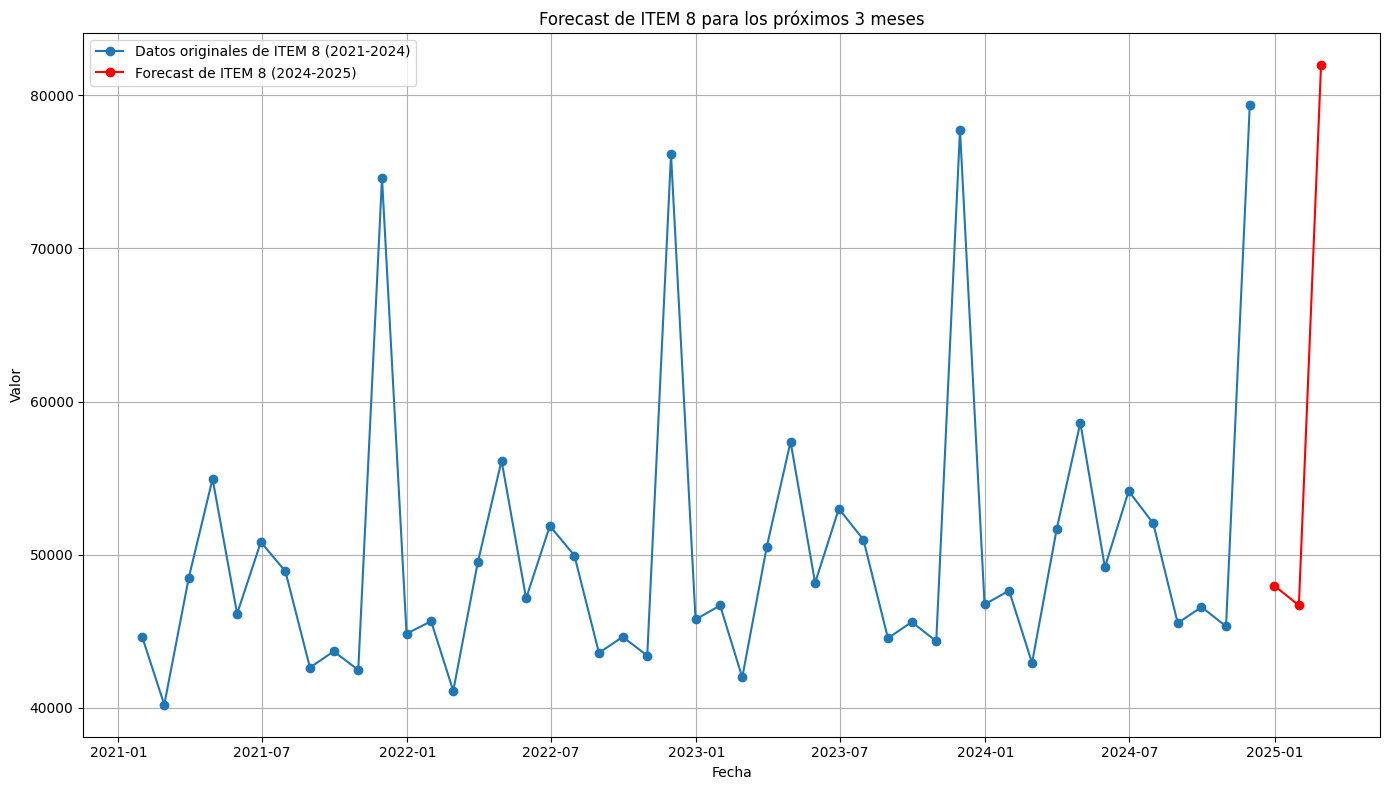

Forecast para ITEM 9 para los próximos 3 meses:
       Fecha      Forecast
0 2024-12-31  43716.202325
1 2025-01-31  41673.161159
2 2025-02-28  81064.589665


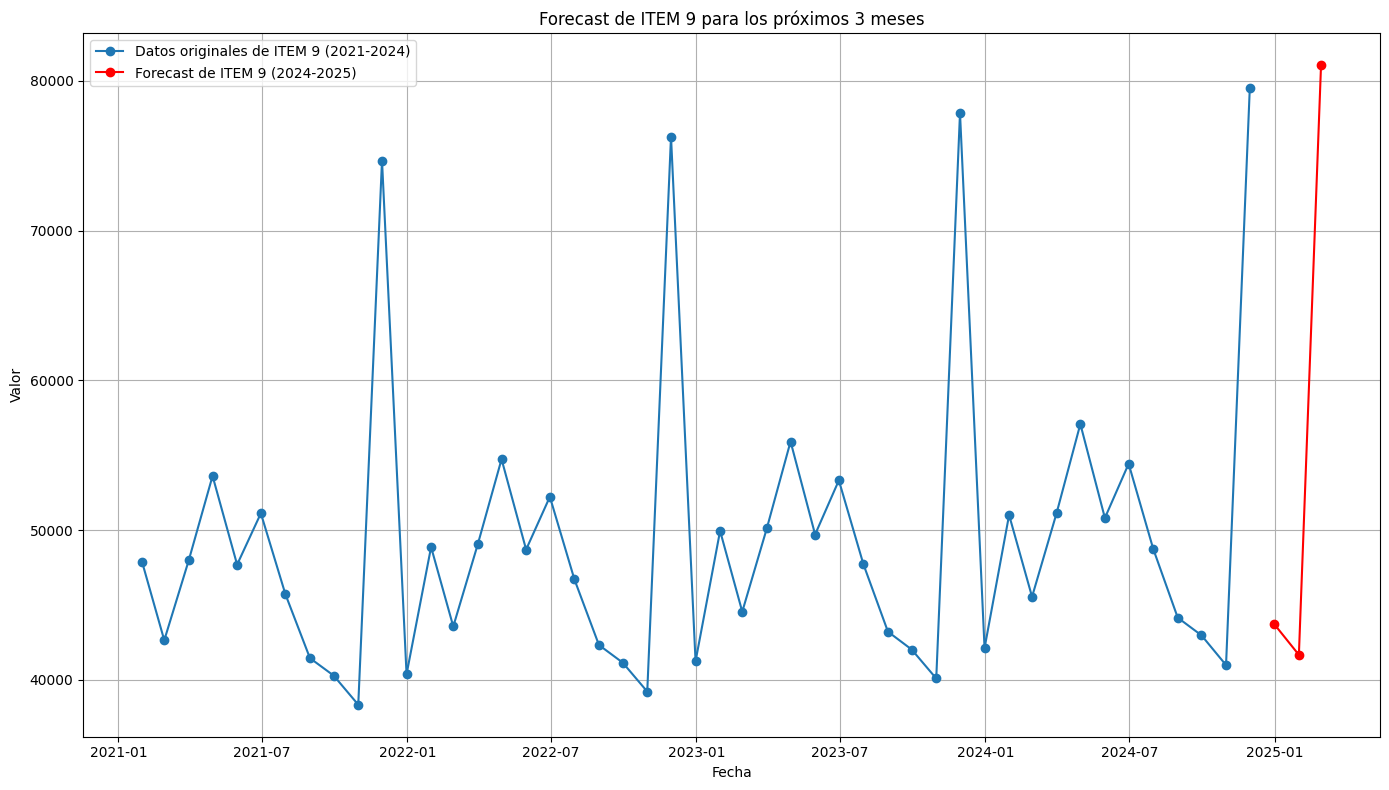

Forecast para ITEM 10 para los próximos 3 meses:
       Fecha      Forecast
0 2024-12-31  44529.909081
1 2025-01-31  44862.554885
2 2025-02-28  80986.694599


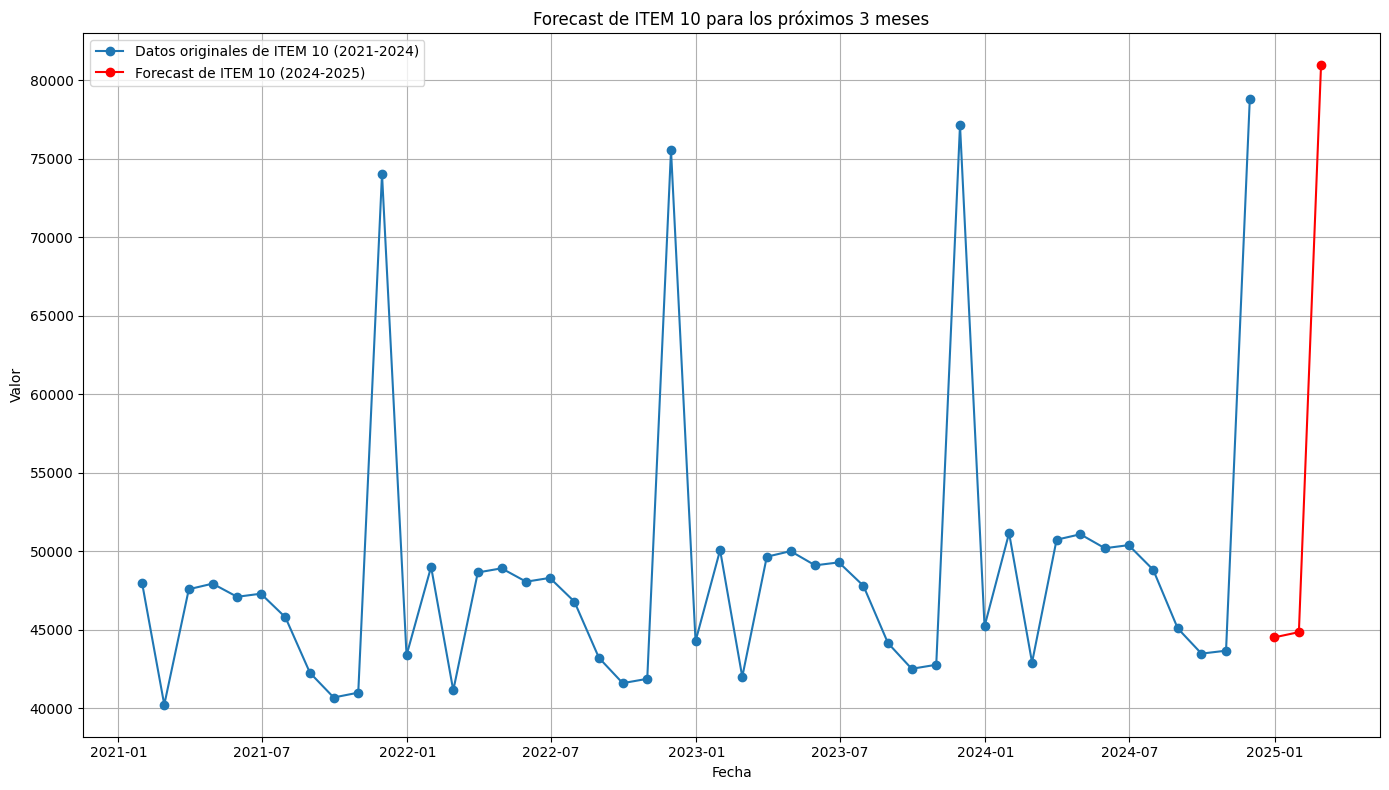

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

# Cargar el archivo Excel
url = "https://github.com/santiagonajera/optimizacionInventrios/raw/refs/heads/main/EjemploClases-Eco.xlsx"
df = pd.read_excel(url, sheet_name='Historico')

# Extraer los nombres de los items
items = df.iloc[1:, 0].values

# Crear un DataFrame con los datos de todos los items
dates = pd.date_range(start='2021-01', periods=df.shape[1] - 1, freq='ME')  # Usar 'ME' en lugar de 'M'
df_items = pd.DataFrame(df.iloc[1:, 1:].values, columns=dates, index=items).T

# Iterar sobre cada item para calcular el forecast
for item in items:
    item_data = df_items[item].values.astype(float)

    # Descomponer la serie temporal en tendencia, estacionalidad y residuos
    result = seasonal_decompose(item_data, model='multiplicative', period=12)

    # Obtener los índices estacionales
    seasonal_indices = result.seasonal

    # Normalizar los índices estacionales
    seasonal_indices_normalized = seasonal_indices / seasonal_indices.mean()

    # Calcular la tendencia utilizando regresión lineal
    x = np.arange(len(item_data)).reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, item_data)

    # Predecir la tendencia para los próximos 3 meses
    future_dates = pd.date_range(start='2024-12', periods=3, freq='ME')  # Usar 'ME' en lugar de 'M'
    future_x = np.arange(len(item_data), len(item_data) + 3).reshape(-1, 1)
    future_trend = model.predict(future_x)

    # Aplicar los índices estacionales a la tendencia para obtener el forecast
    future_seasonal_indices = seasonal_indices_normalized[-3:]  # Eliminar el uso de .values
    future_forecast = future_trend * future_seasonal_indices

    # Crear un DataFrame con los resultados
    future_df = pd.DataFrame({'Fecha': future_dates, 'Forecast': future_forecast})

    # Imprimir el forecast
    print(f"Forecast para {item} para los próximos 3 meses:")
    print(future_df)

    # Graficar los datos originales y el forecast
    plt.figure(figsize=(14, 8))

    # Datos originales
    plt.plot(dates, item_data, label=f'Datos originales de {item} (2021-2024)', marker='o')

    # Forecast
    plt.plot(future_dates, future_forecast, label=f'Forecast de {item} (2024-2025)', marker='o', color='red')

    plt.title(f'Forecast de {item} para los próximos 3 meses')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()